In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

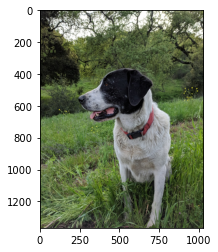

In [2]:
full = cv2.imread("sammy.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

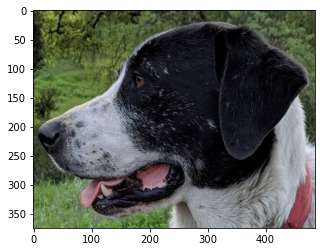

In [3]:
face = cv2.imread("sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [4]:
face.shape

(375, 486, 3)

In [5]:
full.shape

(1367, 1025, 3)

In [6]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

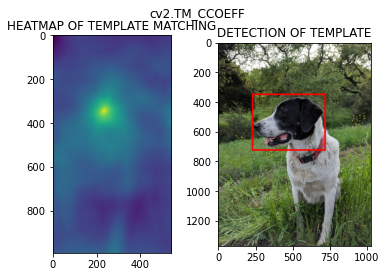

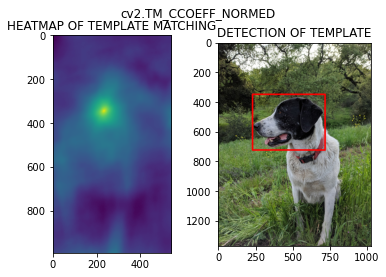

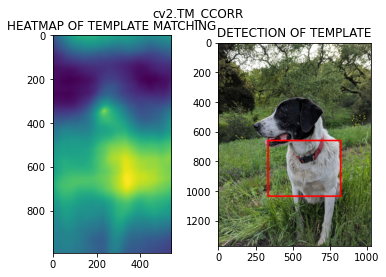

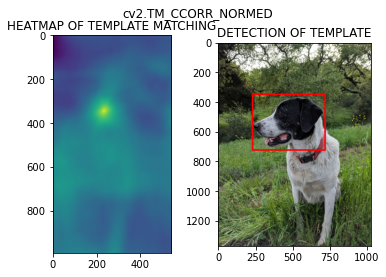

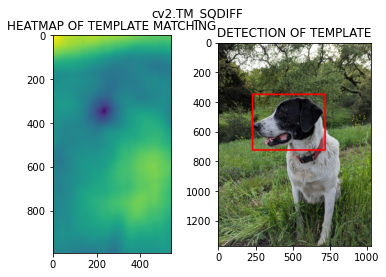

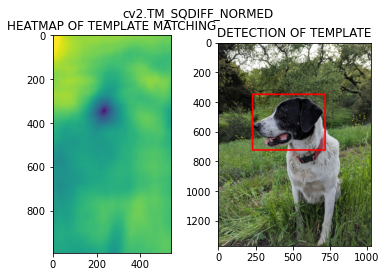

In [7]:
for m in methods:
    # Create a copy of the full image
    full_copy = full.copy()
    method = eval(m)
    # Template Matching
    res = cv2.matchTemplate(full_copy,face,method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    height, width, channels = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    # plot and show the images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    # Title with the method used
    plt.suptitle(m)
    
    plt.show()
    print('\n')
    print('\n')
    